In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= pd.read_csv(r'C:\Users\ASUS\Desktop\Unified Mentor\Supermart Grocery Sales - Retail Analytics Dataset.csv')
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


# Missing Values

In [4]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

# Checking Duplicates

In [5]:
df["Order ID"].value_counts()

Order ID
OD1       1
OD6666    1
OD6659    1
OD6660    1
OD6661    1
         ..
OD3333    1
OD3334    1
OD3335    1
OD3336    1
OD9994    1
Name: count, Length: 9994, dtype: int64

# Univariate Analysis

In [6]:
df["Category"].value_counts()

Category
Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: count, dtype: int64

In [7]:
df["Sub Category"].value_counts()

Sub Category
Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: count, dtype: int64

In [8]:
df["City"].value_counts()

City
Kanyakumari       459
Tirunelveli       446
Bodi              442
Krishnagiri       440
Vellore           435
Perambalur        434
Tenkasi           432
Chennai           432
Salem             431
Karur             430
Pudukottai        430
Coimbatore        428
Ramanadhapuram    421
Cumbum            417
Virudhunagar      416
Madurai           408
Ooty              404
Namakkal          403
Viluppuram        397
Dindigul          396
Theni             387
Dharmapuri        376
Nagercoil         373
Trichy            357
Name: count, dtype: int64

In [9]:
df["Region"].value_counts()

Region
West       3203
East       2848
Central    2323
South      1619
North         1
Name: count, dtype: int64

In [10]:
df["State"].value_counts()

State
Tamil Nadu    9994
Name: count, dtype: int64

In [11]:
# Check for duplicates
df[df.duplicated()]

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State


In [12]:
# Convert 'Order Date' to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=False, errors='coerce')

In [13]:
# Extract day, month, and year from 'Order Date'
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

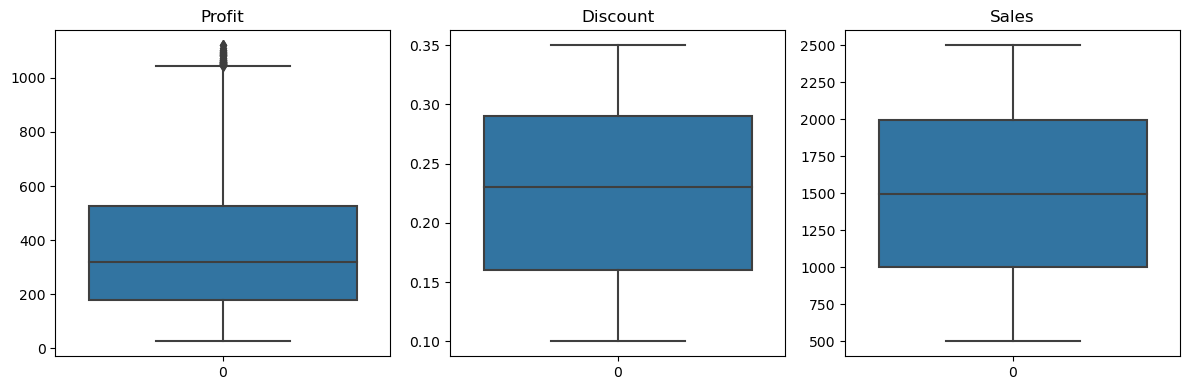

In [14]:
# Visualizing Outliers
# Using boxplots to visualize potential outliers in 'Profit', 'Discount', and 'Sales'
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(df['Profit']).set_title('Profit')
plt.subplot(1, 3, 2)
sns.boxplot(df['Discount']).set_title('Discount')
plt.subplot(1, 3, 3)
sns.boxplot(df['Sales']).set_title('Sales')
plt.tight_layout()
plt.show()

# Bivariate Analysis

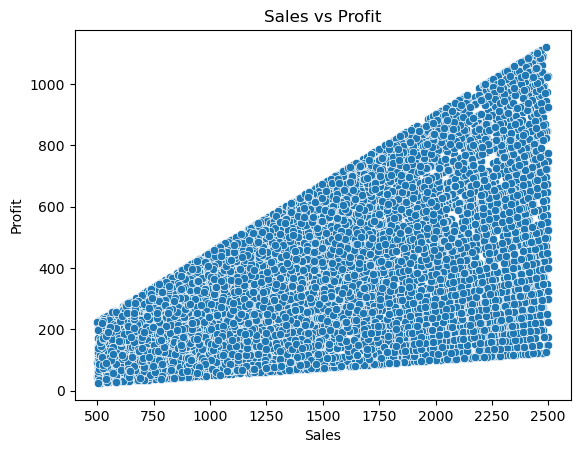

In [15]:
# Scatter plot for Sales vs Profit
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.show()


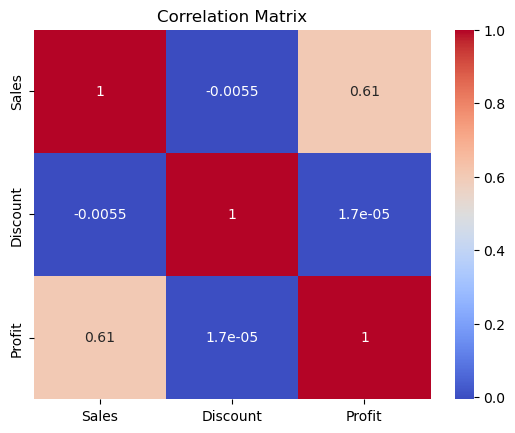

In [16]:
# Correlation matrix for numerical variables
correlation_matrix = df[['Sales', 'Discount', 'Profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

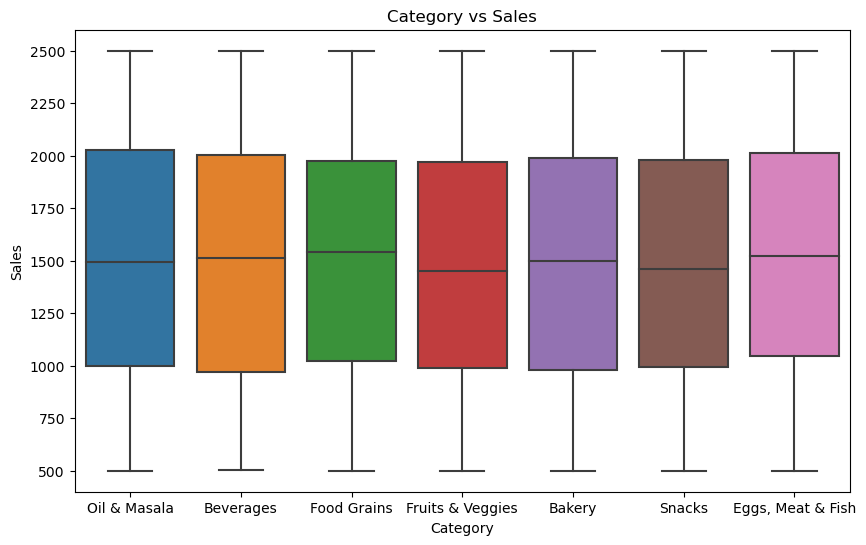

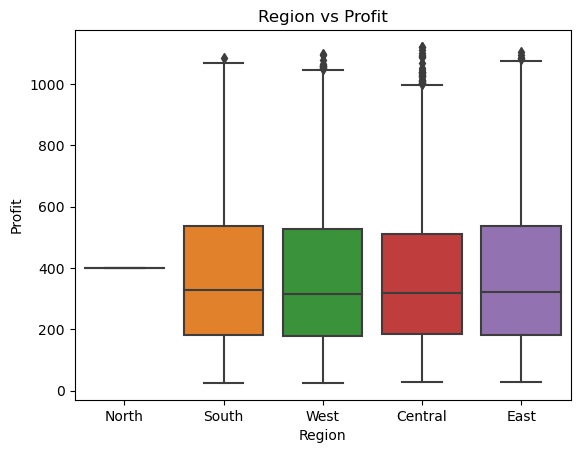

In [17]:
# Box plot for Category vs Sales

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='Category', y='Sales', data=df)

# Add title and labels
plt.title('Category vs Sales')
plt.xlabel('Category')
plt.ylabel('Sales')

# Display the plot
plt.show()

# Box plot for Region vs Profit
sns.boxplot(x='Region', y='Profit', data=df)
plt.title('Region vs Profit')
plt.show()

# Group Analysis for Summary Statistics

In [18]:
# Grouping by Category and calculating mean sales
category_sales = df.groupby('Category')['Sales'].mean()
print(category_sales)

# Grouping by Region and calculating total profit
region_profit = df.groupby('Region')['Profit'].sum()
print(region_profit)

Category
Bakery               1494.891012
Beverages            1489.509286
Eggs, Meat & Fish    1521.745638
Food Grains          1513.070100
Fruits & Veggies     1481.471791
Oil & Masala         1497.753123
Snacks               1477.903567
Name: Sales, dtype: float64
Region
Central     856806.84
East       1074345.58
North          401.28
South       623562.89
West       1192004.61
Name: Profit, dtype: float64


Region             Central  East  North  South  West
Category                                            
Bakery                 309   392      0    240   472
Beverages              343   385      0    227   445
Eggs, Meat & Fish      331   449      0    233   477
Food Grains            310   393      0    232   463
Fruits & Veggies       355   384      0    234   445
Oil & Masala           300   416      1    202   442
Snacks                 375   429      0    251   459


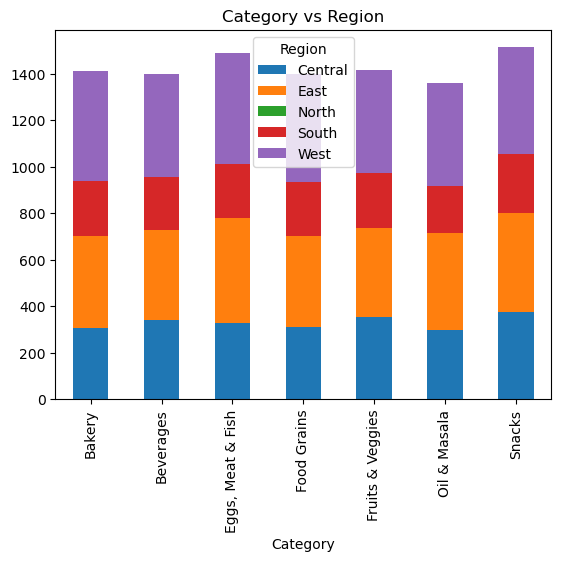

In [19]:
# Crosstab for Category and Region
category_region_crosstab = pd.crosstab(df['Category'], df['Region'])
print(category_region_crosstab)

# Bar plot for visualizing crosstab data
category_region_crosstab.plot(kind='bar', stacked=True)
plt.title('Category vs Region')
plt.show()

# Time Series Analysis

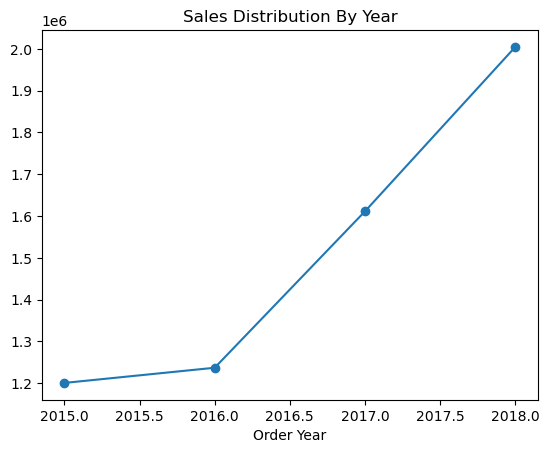

In [20]:
# Grouping by year and plotting total sales
sales_by_year = df.groupby('Order Year')['Sales'].sum()
sales_by_year.plot(kind='line', marker='o')
plt.title('Sales Distribution By Year')
plt.show()


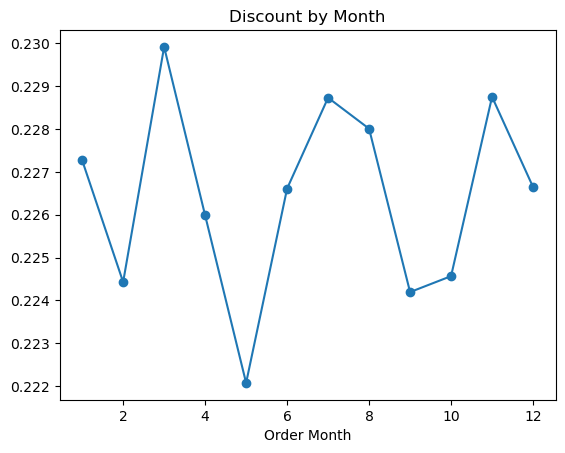

In [21]:
# Grouping by month and plotting average discount
discount_by_month = df.groupby('Order Month')['Discount'].mean()
discount_by_month.plot(kind='line', marker='o')
plt.title('Discount by Month')
plt.show()

# Train ,Testing and Prediction

In [22]:
# Initialize the label encoder
le = LabelEncoder()
# Encode categorical variables
df['Category'] = le.fit_transform(df['Category'])
df['Sub Category'] = le.fit_transform(df['Sub Category'])
df['City'] = le.fit_transform(df['City'])
df['Region'] = le.fit_transform(df['Region'])
df['State'] = le.fit_transform(df['State'])
df['Month'] = le.fit_transform(df['Order Month'])
# Display the first few rows after encoding
print(df.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  Month  
0   1254      0.12  401.28      0        8.0         11.0      2017.0     10  
1    749      0.18  149.80      0        8.0         11.0      2017.0     10  
2   2360      0.21  165.20      0       12.0          6.0      2017.0      5  
3    896      0.25   89.60      0       11.0         10.0      2016.0      9  
4   2355      0.26  918.45      0       11.0         10.0      2016.0      9  


In [23]:
# Select features and target variable
features = df.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Order Month'])
target = df['Sales']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [25]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with mean strategy (you can also choose 'median', 'most_frequent', etc.)
imputer = SimpleImputer(strategy='median')

# Impute missing values in X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)



# Linear Regresssion Model

In [27]:
# Initialize the model
model = LinearRegression()

# Train the model on imputed training data
model.fit(X_train_imputed, y_train)

# Make predictions on imputed test data
y_pred = model.predict(X_test_imputed)

In [28]:
# Calculate MSE and R-squared

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212698.9096365072
R-squared: 0.355099454164308


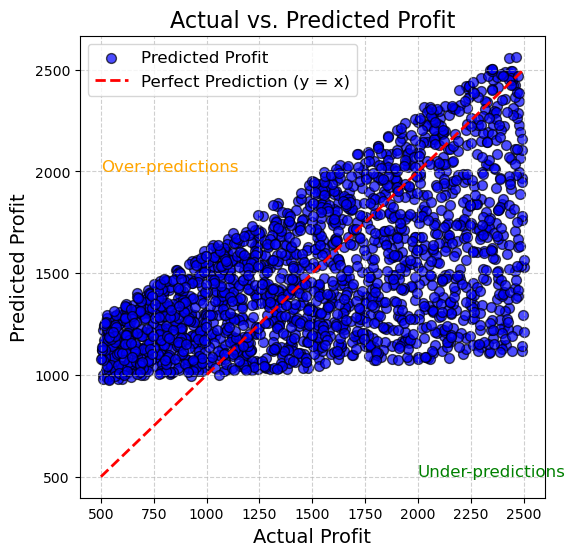

In [31]:
#Visualize the Results

# Set the figure size
plt.figure(figsize=(6,6))

# Scatter plot for actual vs. predicted profits
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k', s=50, label='Predicted Profit')

# Line of equality (y = x) for visual reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction (y = x)')

# Add plot labels and title
plt.xlabel('Actual Profit', fontsize=14)
plt.ylabel('Predicted Profit', fontsize=14)
plt.title('Actual vs. Predicted Profit', fontsize=16)

# Add annotations to improve plot readability
plt.annotate('Under-predictions', xy=(y_test.max()*0.8, y_test.max()*0.2), color='green', fontsize=12)
plt.annotate('Over-predictions', xy=(y_test.max()*0.2, y_test.max()*0.8), color='orange', fontsize=12)

# Add grid lines for easier visual comparison
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend for clarity
plt.legend(fontsize=12)

# Show the plot
plt.show()

# Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_imputed)

# Calculate MSE and R-squared for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')


Random Forest - Mean Squared Error: 224792.47037333663
Random Forest - R-squared: 0.31843192289389943
